In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from re import sub
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk import ngrams

from src.utils.clean_comments import CommentCleaner
import os

In [3]:
file_dir = '../data/comments/'
df_list = []
for fn in [tf for tf in os.listdir(file_dir) if ('.csv' in tf) & (~tf.endswith('_.csv'))]:
    df = pd.read_csv(file_dir+fn)
    df['date_aired'] = pd.to_datetime(fn.split('_')[-1].split('.')[0]).strftime('%Y-%m-%d')
    df_list.append(df[['date_aired','sender_name','text']])

In [4]:
all_df = pd.concat(df_list).reset_index().rename(columns={'index':'comment_id'})
all_df['comment_id'] = all_df['comment_id']+61
all_df['comment_id']= all_df.apply(lambda x: \
                                   x['date_aired'].replace('-','')+str(x['comment_id']).rjust(4, '0'), axis=1)
all_df

,comment_id,date_aired,sender_name,text
0,202207070061,2022-07-07,John Godfrey,Palala lamang po sa mga ofws sa ksa wag mameke...
1,202207070062,2022-07-07,Rowena Ascrate,"Hello,watching po from uae"
2,202207070063,2022-07-07,Zhai Vhie Gimoro Francisco,Help nyo po aq sir arnel
3,202207070064,2022-07-07,Cbbc Fort Bonifacio SharjahOutreach,Good evening po Sirs and Mam
4,202207070065,2022-07-07,Agripina Esmajer,Hi Sir Arnel good evening Po!watching from San...
...,...,...,...,...
26214,202207211605,2022-07-21,Sarupac Jessa,Magandang araw po saan po pwede lumapit kung m...
26215,202207211606,2022-07-21,Sarupac Jessa,Magandang araw po saan po pwede lumapit kung m...
26216,202207211607,2022-07-21,Muslimah Balik Islam,From U.A.E pano po mag aply s owwa scholarship
26217,202207211608,2022-07-21,Lina Gabis,Sir tanong lang nagrenew kasi kami ng mga kasa...


In [5]:
# drop null rows
all_df = all_df[~all_df['text'].isna()].reset_index(drop=True)

### Clean comments

In [6]:
cleaner = CommentCleaner()
len(cleaner.get_padwords())

31

In [7]:
test_comment = 'pa aksyunan naman po yung dole akap region tapos na po yung pangako nila na first week ng september ano na po next na reason nila'
print(test_comment)
print(cleaner.clean_comment(test_comment))

pa aksyunan naman po yung dole akap region tapos na po yung pangako nila na first week ng september ano na po next na reason nila
aksyunan dole akap region tapos pangako first week september next reason


In [8]:
all_df['clean_text'] = all_df['text'].apply(lambda x: cleaner.clean_comment(x))
all_df['clean_text_word_count'] = all_df['clean_text'].apply(lambda x: len(x.split(' ')))

In [9]:
all_df['text_word_count'] = all_df['text'].apply(lambda x: len(x.split(' ')))

In [10]:
all_df[['text','clean_text']].iloc[700:750]

,text,clean_text
700,Sana manoticed ung comment qpo,manoticed comment
701,Kuwait sir sana makasali ng anak ko sa Scholar...,kuwait anak scholar nme john mark antony pajente
702,Dinaman Na susunod Yan 600 dollar\nsahod oooyyy.,dinaman susunod 600 dollar sahod oooyyy
703,Sir di ba maalis ang OEC dito sa UAE?pahirap p...,maalis oec uae pahirap samin sobra proseso
704,Sir paano po ma claim ang rebates nasa mindana...,claim rebates mindanao
705,Bagal ng bigay ng owwa balik pinas kainis dami...,bagal bigay owwa balik pinas kainis requirment
706,Nku nag punta si sir arnel dto sa oman hanggan...,punta oman muscat wala
707,Nag filr nko nang balik pinas pangkabuhayan te...,filr nko balik pinas pangkabuhayan tel wala
708,Hello sir arnel good bless po,
709,Sir arnel paano po kami maka alis s amo namin po,alis amo


In [12]:
# tl_stopwords = pd.read_csv('../data/tl_stopwords.csv', header=None)
# tl_stopwords['n'] = tl_stopwords[0].apply(len)
# tl_stopwords.sort_values(by='n')
#tl_stopwords[0].to_csv('../data/tl_stopwords_.csv', index=False)

In [13]:
len(all_df[all_df['text_word_count']<=5])

7093

In [14]:
all_df[all_df['text_word_count']<=5]

,comment_id,date_aired,sender_name,text,clean_text,clean_text_word_count,text_word_count
1,202207070062,2022-07-07,Rowena Ascrate,"Hello,watching po from uae",uae,1,4
15,202207070076,2022-07-07,Rechelle Nadao,Watching from saudi riyadh po,saudi riyadh,2,5
16,202207070077,2022-07-07,Gen Evieve,Watching from Kuwait po,kuwait,1,4
17,202207070078,2022-07-07,Alda P. Pecate,Hello po watching from Bahrain,bahrain,1,5
22,202207070083,2022-07-07,Wilma Olayres,God bless everyone po,everyone,1,4
...,...,...,...,...,...,...,...
26112,202207211597,2022-07-21,Waka Waka Leizel,Waching from the promised land,promised land,2,5
26113,202207211598,2022-07-21,Waka Waka Leizel,Watchinh from the promised land,promised land,2,5
26114,202207211599,2022-07-21,Ann Lerin,Anna bella lerin,anna bella lerin,3,3
26115,202207211600,2022-07-21,Jarred Vidal De Guzman,OWWA Membership Question.,owwa membership question,3,3


In [15]:
# text = 'Watching from saudi riyadh po'
# text = cleaner.sanitize_text(text)
# text = cleaner.remove_stopwords(text)
# text = cleaner.remove_padwords(text)
# text

In [16]:
#cleaner.remove_padwords("ma'am patulong po")

In [17]:
cleaner.compute_fuzz_score("thank","thank")

100

In [19]:
len(all_df)

26125

In [20]:
# remove comments fewer than 6 words
all_df = all_df[all_df['text_word_count'] >= 6].reset_index(drop=True)
len(all_df)

19032

In [21]:
# remove comments empty text after cleaning
all_df = all_df[all_df['clean_text_word_count'] >= 2].reset_index(drop=True)
len(all_df)

17536

In [22]:
all_df[all_df['clean_text_word_count'] == 2]

,comment_id,date_aired,sender_name,text,clean_text,clean_text_word_count,text_word_count
5,202207070069,2022-07-07,Nene Ike,Hello po watching from Cyprus Europe God bless...,cyprus europe,2,12
8,202207070080,2022-07-07,Arabella Constantino,Hi po sir arnel ignacio..watching from Riyadh ...,riyadh saudi,2,8
9,202207070081,2022-07-07,Rinbel Vale,"Good evening po sir arnell, I'm watching from ...",riyadh saudi,2,10
14,202207070087,2022-07-07,Maricel Adriano Malana,"Hello po good day,watching from qatar",day qatar,2,6
16,202207070090,2022-07-07,Beth Sobremonte,Hello po gud eve..to all staff,eve staff,2,6
...,...,...,...,...,...,...,...
17472,202207211464,2022-07-21,Annah Lyne,Gud eve po watching from hongkong,eve hongkong,2,6
17509,202207211536,2022-07-21,Junie Frasco Canete,Hello sir/mam watching from abha ksa,abha ksa,2,6
17510,202207211562,2022-07-21,Odnaib Gracekiel,Hi po good eve from Kuwait,eve kuwait,2,6
17511,202207211566,2022-07-21,Kristy Fajardo,Hello po sir watching ofw from qatar,ofw qatar,2,7


In [23]:
all_df['clean_text_word_count'].describe()

count    17536.000000
mean         9.062044
std          8.038674
min          2.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        207.000000
Name: clean_text_word_count, dtype: float64

## Word Cloud

In [24]:
vectorizer = TfidfVectorizer(min_df=1, max_df=9)

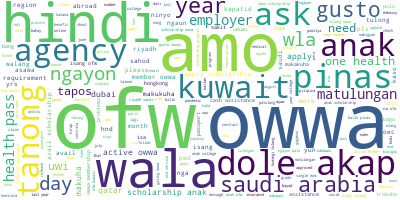

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(all_df['clean_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [26]:
corpus = []
nwords = [1,2,3,4]

for n in nwords:
    nword_corpus = []
    for text in all_df['clean_text'].values:
        nword_corpus.extend((ngrams(text.split(), n)))
    corpus.append(nword_corpus)

In [36]:
words_top = pd.DataFrame(pd.Series([str(set(x))[1:-1] for x in corpus[0]]).value_counts()[0:500], columns=['frequency'])
words_top.to_csv('../output/top_unigrams.csv')

In [40]:
bigrams_top = pd.DataFrame(pd.Series([str(set(x))[1:-1] for x in corpus[1]]).value_counts()[0:200], columns=['frequency'])
bigrams_top.to_csv('../output/top_bigrams.csv')                

In [41]:
trigrams_top = pd.DataFrame(pd.Series([str(set(x))[1:-1] for x in corpus[2]]).value_counts()[0:100], columns=['frequency'])
trigrams_top.to_csv('../output/top_3grams.csv')

In [42]:
quadgrams_top = pd.DataFrame(pd.Series([str(set(x))[1:-1] for x in corpus[3]]).value_counts()[0:100], columns=['frequency'])
quadgrams_top.to_csv('../output/top_4grams.csv')           

## Topic identification

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

In [32]:
def get_topic_words(model, feature_names, n_top_words):
    data= []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = [feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]]
        data.append([topic_idx+1,topic_keywords])
    result_df = pd.DataFrame(data, columns=['ID','Topic Keywords'])
    return result_df

In [33]:
tfidf_vectorizer = TfidfVectorizer(stop_words=[], ngram_range=(2,3))
nmf = NMF(n_components=10)
pipe = make_pipeline(tfidf_vectorizer, nmf)

pipe.fit(all_df['clean_text'].values)
results_df = get_topic_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=5)
results_df.to_csv("../output/topics_nmf.csv",index=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
lda = LatentDirichletAllocation(n_components=10)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(all_df['clean_text'].values)

results_df = get_topic_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=5)
results_df.to_csv("../output/topics_lda.csv",index=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Check keywords

In [43]:
all_df[all_df['text'].str.contains('appointment')][['text','clean_text']].values

array([['Sir pwdeng magtanong sa abudhabi ga po pag nag renyo ng owwa pwde direct na akong.pumunta kc d ako marunong sa online appointment.',
        'pwdeng abudhabi renyo owwa direct pumunta online appointment'],
       ['Sir pwde po ba ako pumunta sa philippine embassy.. Kahit wlang appointment.. Sir.. Para mag renew NG passport po7mag expired na ngayong Oct 2o 2022',
        'pumunta philippine embassy wlang appointment renew passport po7mag expired ngayong oct 2022'],
       ['Bakit ang Hirap mag book ng appointment po sa OWwa ??kawawa namna mga ofw pauwi n lng pahirapan pa Pag balik din pahirapan din',
        'hirap book appointment owwa kawawa namna ofw pauwi pahirapan balik pahirapan'],
       ['Hirap pong magbook ng appointment sa balik manggagawa.. Nag lolog po ung system..',
        'hirap magbook appointment balik manggagawa lolog system'],
       ['Good morning po dito po ako ngayon pinas sir/Mam ask ko lng po paano po yung di po maka log in sa bagong site ng OEC kasi po 

In [45]:
all_df[all_df['text'].str.contains('certification')][['text','clean_text']].values

array([['Sana po matulungan nyo aq 4 years po aq d nkauw kac dahil po SA pandemic Kaya po d aq nkaactive SA owwa tpos lag nga po aq my sakit SA ibh bnsa dala q po lahat Ng medical certification q thank u po',
        'matulungan years nkauw kac pandemic nkaactive owwa tpos lag nga sakit ibh bnsa dala medical certification'],
       ['Sir panu po Kung my hawak aqng doctor certification Laban s amo n nanakit',
        'hawak doctor certification laban amo nanakit'],
       ['Sir my hawak aq na doctor certification anu po gagawin s amoq',
        'hawak doctor certification gagawin amoq'],
       ['Sir may hawak po aq na doctor certification anu po pwde gawin sa amoq sir',
        'hawak doctor certification amoq'],
       ['Sir gusto po sana namin maka avail ng balik Pinas trabho kaso po wla po certification letter sa company ng mister ko na nagppatunay na hindi po sya nkabalik sa work nya dahil sa covid..paano po pwede gawin sir salamat po.kc parang malabo makakuha kasi dito na sya sa P